In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FormatStrFormatter

In [2]:
convex = pd.read_excel("./template_excel/convex_detail_PTC_20230712_new.xlsx")

In [3]:
ellipse = pd.read_excel("./template_excel/ellipse_detail_BFC_0712_new.xlsx")

In [4]:
ellipse = ellipse.drop("Unnamed: 0",axis=1)

In [5]:
merge = pd.concat([ellipse,convex])

In [6]:
merge

,mass_name,img_name,threshold,center,axle_short,axle_long,ratio,angle,area_cv2,perimeter,contours_pixel,contours_number,type,calcularity
0,BFC_20_015HT_44,BFC_20_015HT_44_1,130,"(138.39991760253906, 162.02569580078125)",25.800989,28.722198,1.113221,25.633991,590.5,94.325901,121.586667,41,HT,0.833581
1,BFC_20_015HT_44,BFC_20_015HT_44_5,130,"(180.62342834472656, 131.61355590820312)",29.766766,30.941345,1.039459,116.370674,693.0,111.740114,116.698851,49,HT,0.697115
2,BFC_20_015HT_44,BFC_20_015HT_44_10,130,"(211.50559997558594, 111.84771728515625)",24.316208,30.800104,1.266649,166.917999,579.5,92.669046,122.059722,37,HT,0.847566
3,BFC_20_015HT_44,BFC_20_015HT_44_11,130,"(115.06068420410156, 90.58736419677734)",21.845362,25.631424,1.173312,78.253372,429.5,80.669047,125.513651,33,HT,0.828970
4,BFC_20_015HT_60,BFC_20_015HT_60_2,135,"(159.7198028564453, 313.9161071777344)",22.827908,37.206638,1.629875,63.613754,629.0,119.053823,119.956183,60,HT,0.557383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61698,PTC_18_114_C_7,PTC_18_114_C_7_4,150,"(25.23188018798828, 372.13726806640625)",21.507936,22.412224,1.042044,179.374008,371.5,91.497473,146.170274,47,PTC,0.557353
61699,PTC_18_114_C_7,PTC_18_114_C_7_10,150,"(344.8179626464844, 269.1244201660156)",16.191385,38.405937,2.371998,66.419403,275.0,119.740114,126.056469,59,PTC,0.240903
61700,PTC_18_114_C_7,PTC_18_114_C_7_79,150,"(204.18914794921875, 106.93700408935547)",16.766100,21.212500,1.265202,127.885872,271.0,67.254833,145.313492,33,PTC,0.752509
61701,PTC_18_114_C_7,PTC_18_114_C_7_87,150,"(381.6947326660156, 93.18396759033203)",24.777472,36.792564,1.484920,56.854118,663.0,118.710676,143.766590,60,PTC,0.590913


In [7]:
merge.describe()

,threshold,axle_short,axle_long,ratio,angle,area_cv2,perimeter,contours_pixel,contours_number,calcularity
count,132744.000000,132744.000000,132744.000000,132744.000000,132744.000000,132744.000000,132744.000000,132744.000000,132744.000000,132744.000000
mean,138.719264,23.507185,29.937746,1.287992,89.462471,537.787953,95.449815,131.413095,43.991502,0.742028
std,7.467546,3.957201,5.605183,0.229707,52.118942,179.571841,17.678454,8.860479,10.219711,0.136426
min,115.000000,15.000725,15.531406,1.000448,0.000000,10.500000,33.556349,69.199563,20.000000,0.080108
25%,135.000000,20.758015,25.999261,1.128018,44.041155,415.500000,82.083260,125.216605,36.000000,0.682269
50%,140.000000,23.254833,28.940401,1.228379,89.140377,507.500000,92.426407,131.126729,43.000000,0.785499
75%,145.000000,25.988888,33.173465,1.381213,134.928474,638.500000,107.154328,137.472934,51.000000,0.841359
max,150.000000,78.112617,98.008827,4.127344,179.996765,2003.000000,231.396969,159.984444,75.000000,0.930827


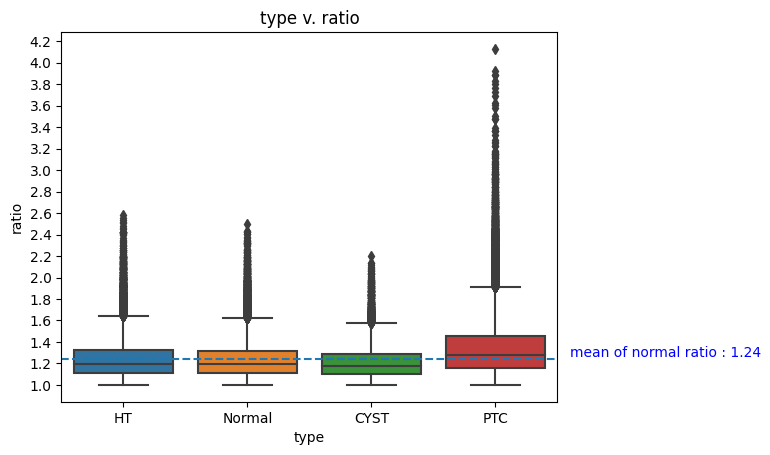

In [12]:
plt.axhline(float(merge[merge["type"]=="Normal"].describe()['ratio']["mean"]), ls='--', )
plt.text(3.6, float(merge[merge["type"]=="Normal"].describe()['ratio']["mean"]), f'mean of normal ratio : {round(merge[merge["type"]=="Normal"].describe()["ratio"]["mean"],2)}', fontsize=10, va='bottom', ha='left',color="b")
plt.yticks(np.arange(0, 5, step=0.2))

plt.title("type v. ratio")
sns.boxplot(y=merge['ratio'], x=merge["type"])
plt.show()

In [ ]:
plt.title("type v. slide_mean")
plt.axhline(int(merge[merge['type']=="Normal"].describe()['slide_mean']['mean']), ls='--')
plt.text(3.6, float(merge[merge["type"]=="Normal"].describe()['slide_mean']["mean"]), f'mean of normal slide_mean : {round(merge[merge["type"]=="Normal"].describe()["slide_mean"]["mean"],2)}', fontsize=10, va='bottom', ha='left',color="b")
sns.boxplot(y=merge["slide_mean"], x=merge["type"])
plt.show()

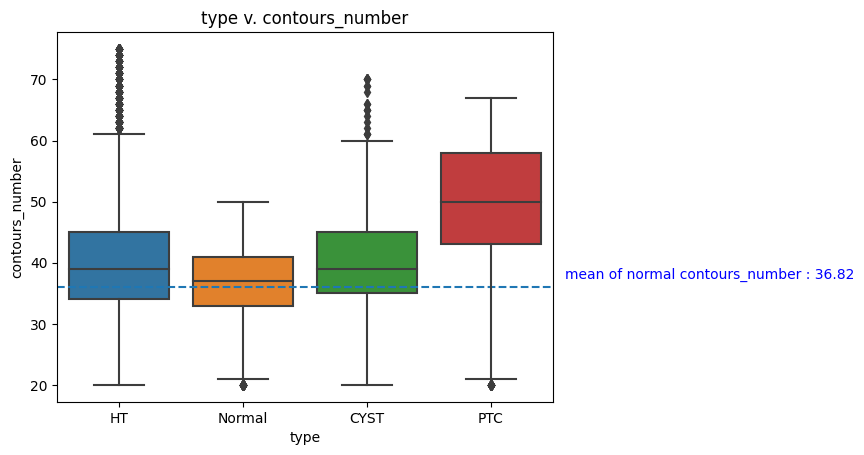

In [13]:
plt.title("type v. contours_number")
plt.axhline(int(merge[merge['type']=="Normal"].describe()['contours_number']['mean']), ls='--')
plt.text(3.6, float(merge[merge["type"]=="Normal"].describe()['contours_number']["mean"]), f'mean of normal contours_number : {round(merge[merge["type"]=="Normal"].describe()["contours_number"]["mean"],2)}', fontsize=10, va='bottom', ha='left',color="b")
sns.boxplot(y=merge["contours_number"], x=merge["type"])
plt.show()

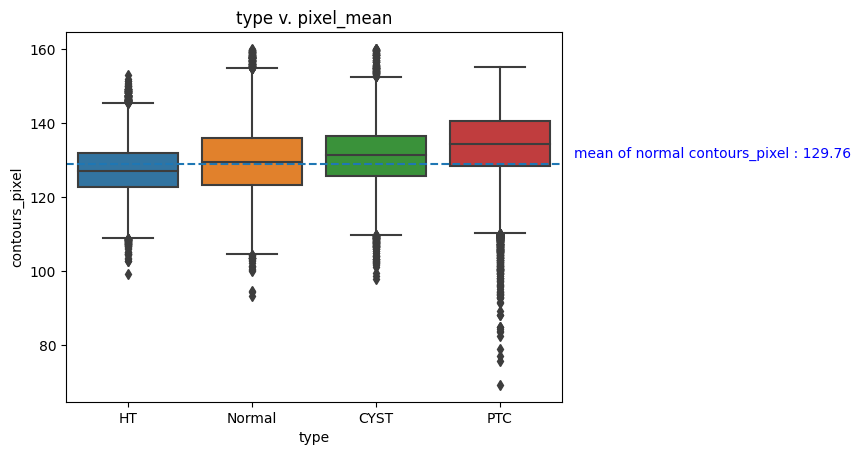

In [14]:
plt.title("type v. pixel_mean")
plt.axhline(int(merge[merge['type']=="Normal"].describe()['contours_pixel']['mean']), ls='--')
plt.text(3.6, float(merge[merge["type"]=="Normal"].describe()['contours_pixel']["mean"]), f'mean of normal contours_pixel : {round(merge[merge["type"]=="Normal"].describe()["contours_pixel"]["mean"],2)}', fontsize=10, va='bottom', ha='left',color="b")
sns.boxplot(y=merge["contours_pixel"], x=merge["type"])
plt.show()

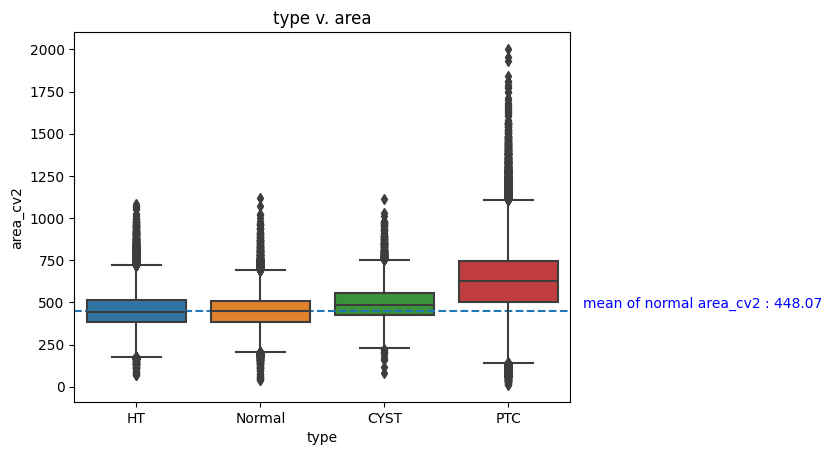

In [15]:
plt.title("type v. area")
plt.axhline(int(merge[merge['type']=="Normal"].describe()['area_cv2']['mean']), ls='--')
plt.text(3.6, float(merge[merge["type"]=="Normal"].describe()['area_cv2']["mean"]), f'mean of normal area_cv2 : {round(merge[merge["type"]=="Normal"].describe()["area_cv2"]["mean"],2)}', fontsize=10, va='bottom', ha='left',color="b")
sns.boxplot(y=merge["area_cv2"], x=merge["type"])
plt.show()

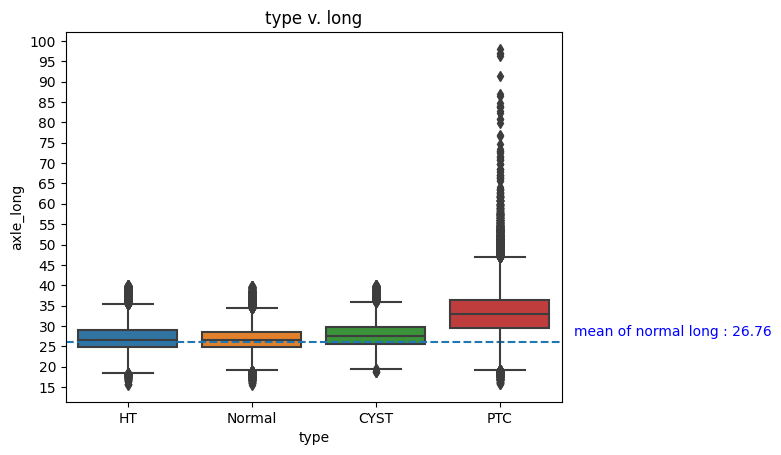

In [16]:
plt.title("type v. long")
plt.yticks(range(0,120,5))
plt.axhline(int(merge[merge['type']=="Normal"].describe()['axle_long']['mean']), ls='--')
plt.text(3.6, float(merge[merge["type"]=="Normal"].describe()['axle_long']["mean"]), f'mean of normal long : {round(merge[merge["type"]=="Normal"].describe()["axle_long"]["mean"],2)}', fontsize=10, va='bottom', ha='left',color="b")
sns.boxplot(y=merge["axle_long"], x=merge["type"])
plt.show()

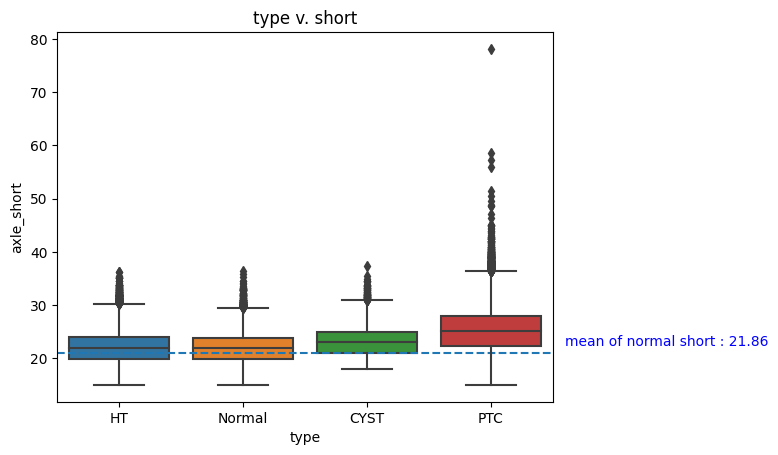

In [17]:
plt.title("type v. short")
plt.axhline(int(merge[merge['type']=="Normal"].describe()['axle_short']['mean']), ls='--')
plt.text(3.6, float(merge[merge["type"]=="Normal"].describe()['axle_short']["mean"]), f'mean of normal short : {round(merge[merge["type"]=="Normal"].describe()["axle_short"]["mean"],2)}', fontsize=10, va='bottom', ha='left',color="b")
sns.boxplot(y=merge["axle_short"], x=merge["type"])
plt.show()

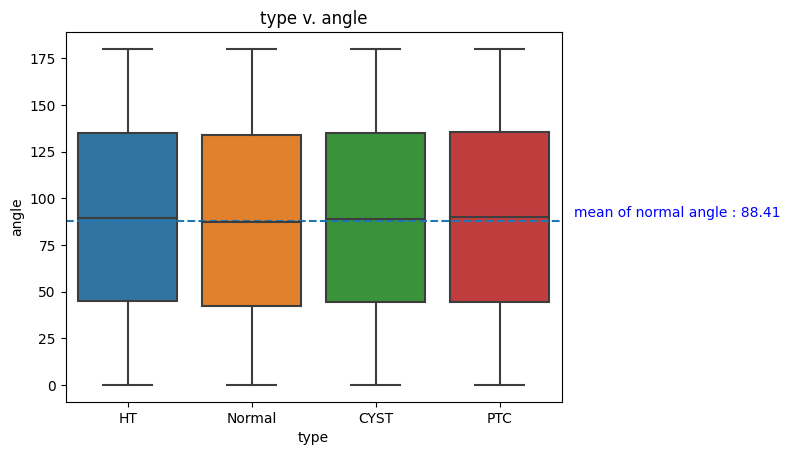

In [18]:
plt.title("type v. angle")
plt.axhline(int(merge[merge['type']=="Normal"].describe()['angle']['mean']), ls='--')
plt.text(3.6, float(merge[merge["type"]=="Normal"].describe()['angle']["mean"]), f'mean of normal angle : {round(merge[merge["type"]=="Normal"].describe()["angle"]["mean"],2)}', fontsize=10, va='bottom', ha='left',color="b")
sns.boxplot(y=merge["angle"], x=merge["type"])
plt.show()

In [19]:
def create_df(col):
    df = pd.DataFrame(columns=['HT','Normal','CYST','PTC'],index=['mean','std','cv'])
    df['CYST'] = [merge[merge['type'].str.contains("CYST")].describe()[col]['mean'],merge[merge['type'].str.contains("CYST")].describe()[col]['std'],merge[merge['type'].str.contains("CYST")].describe()[col]['std']/merge[merge['type'].str.contains("CYST")].describe()[col]['mean']]
    df['Normal'] = [merge[merge['type'].str.contains("Normal")].describe()[col]['mean'],merge[merge['type'].str.contains("Normal")].describe()[col]['std'],merge[merge['type'].str.contains("Normal")].describe()[col]['std']/merge[merge['type'].str.contains("Normal")].describe()[col]['mean']]
    df['HT'] = [merge[merge['type'].str.contains("HT")].describe()[col]['mean'],merge[merge['type'].str.contains("HT")].describe()[col]['std'],merge[merge['type'].str.contains("HT")].describe()[col]['std']/merge[merge['type'].str.contains("HT")].describe()[col]['mean']]
    df['PTC'] = [merge[merge['type'].str.contains("PTC")].describe()[col]['mean'],merge[merge['type'].str.contains("PTC")].describe()[col]['std'],merge[merge['type'].str.contains("PTC")].describe()[col]['std']/merge[merge['type'].str.contains("PTC")].describe()[col]['mean']]
    
    return df

In [20]:
stats_contours_mean = create_df("contours_pixel")
stats_contours_number = create_df("contours_number")
stats_area_cv2 = create_df("area_cv2")
stats_angle = create_df("angle")
# stats_slide_mean = create_df("slide_mean")
stats_long = create_df("axle_long")
stats_short = create_df("axle_short")

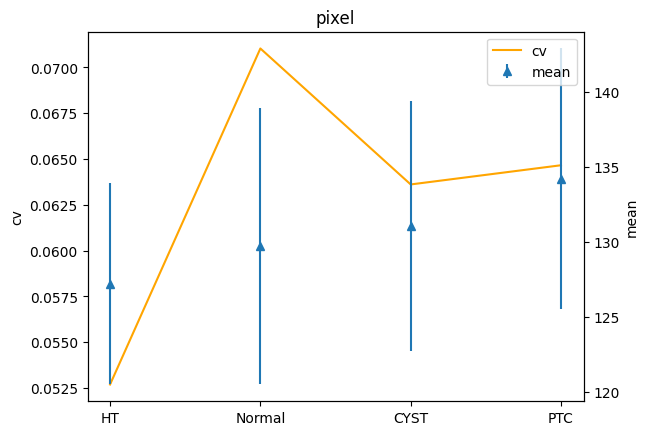

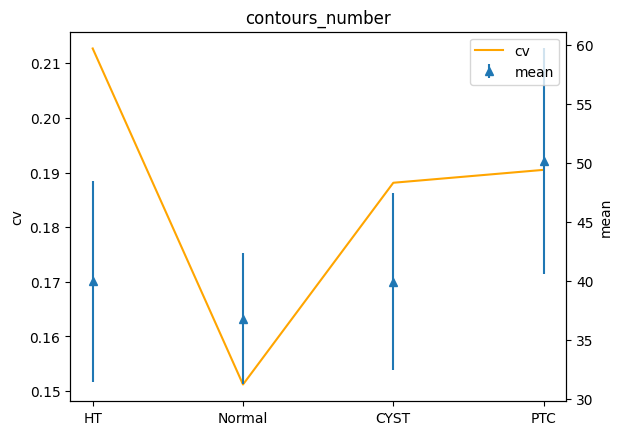

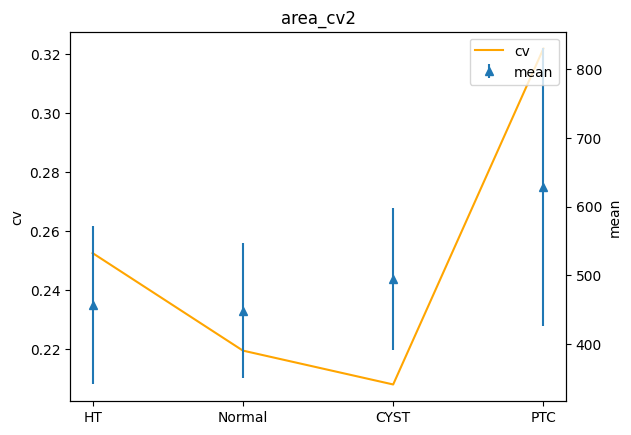

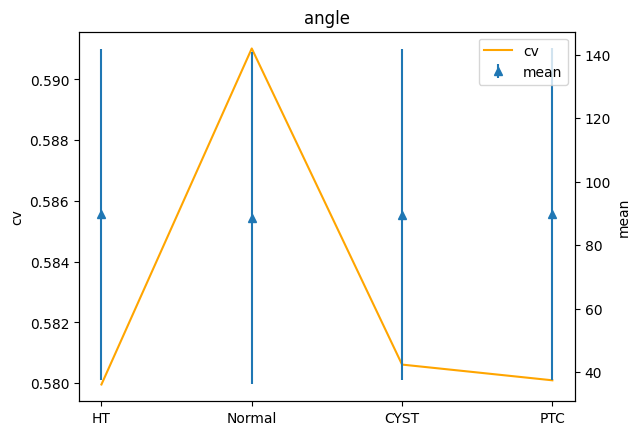

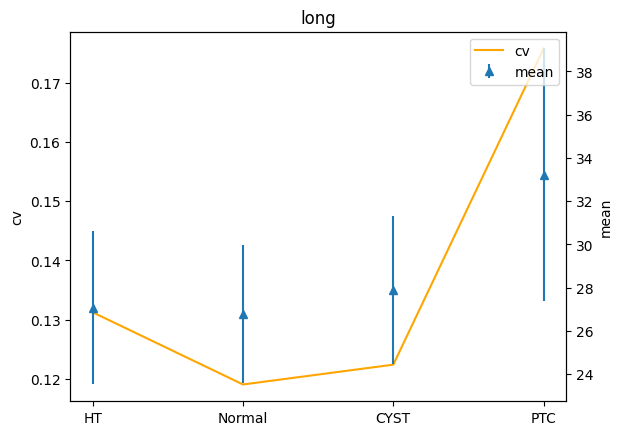

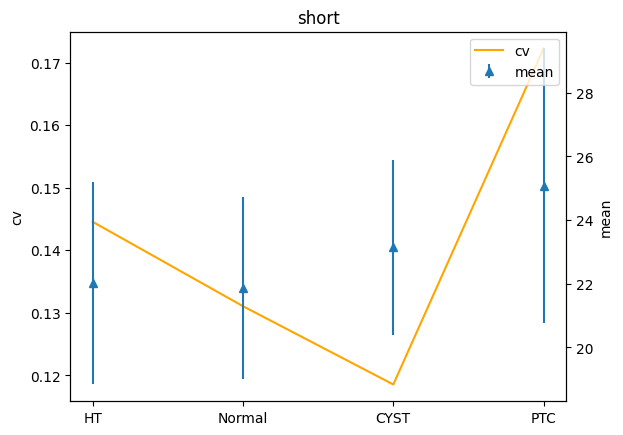

In [21]:
fig, ax = plt.subplots()
ax.set_title("pixel")
ax1 = ax.twinx()
cv = ax.plot(list(stats_contours_mean.columns),stats_contours_mean.loc['cv'],color='orange',label='cv')
ax.set_ylabel('cv')
mean = ax1.errorbar(list(stats_contours_mean.columns), stats_contours_mean.loc['mean'], stats_contours_mean.loc['std'], linestyle='None', marker='^', label='mean')
ax1.set_ylabel('mean')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

fig, ax = plt.subplots()
ax.set_title("contours_number")
ax2 = ax.twinx()
cv2 = ax.plot(list(stats_contours_number.columns),stats_contours_number.loc['cv'],color='orange',label='cv')
ax.set_ylabel('cv')
mean2 = ax2.errorbar(list(stats_contours_number.columns), stats_contours_number.loc['mean'], stats_contours_number.loc['std'], linestyle='None', marker='^', label='mean')
ax2.set_ylabel('mean')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

fig, ax = plt.subplots()
ax.set_title("area_cv2")
ax1 = ax.twinx()
cv = ax.plot(list(stats_area_cv2.columns),stats_area_cv2.loc['cv'],color='orange',label='cv')
ax.set_ylabel('cv')
mean = ax1.errorbar(list(stats_area_cv2.columns), stats_area_cv2.loc['mean'], stats_area_cv2.loc['std'], linestyle='None', marker='^', label='mean')
ax1.set_ylabel('mean')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

fig, ax = plt.subplots()
ax.set_title("angle")
ax1 = ax.twinx()
cv = ax.plot(list(stats_angle.columns),stats_angle.loc['cv'],color='orange',label='cv')
ax.set_ylabel('cv')
mean = ax1.errorbar(list(stats_angle.columns), stats_angle.loc['mean'], stats_angle.loc['std'], linestyle='None', marker='^', label='mean')
ax1.set_ylabel('mean')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# fig, ax = plt.subplots()
# ax.set_title("slide_mean")
# ax1 = ax.twinx()
# cv = ax.plot(list(stats_slide_mean.columns),stats_slide_mean.loc['cv'],color='orange',label='cv')
# ax.set_ylabel('cv')
# mean = ax1.errorbar(list(stats_slide_mean.columns), stats_slide_mean.loc['mean'], stats_slide_mean.loc['std'], linestyle='None', marker='^', label='mean')
# ax1.set_ylabel('mean')
# fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

fig, ax = plt.subplots()
ax.set_title("long")
ax1 = ax.twinx()
cv = ax.plot(list(stats_long.columns),stats_long.loc['cv'],color='orange',label='cv')
ax.set_ylabel('cv')
mean = ax1.errorbar(list(stats_long.columns), stats_long.loc['mean'], stats_long.loc['std'], linestyle='None', marker='^', label='mean')
ax1.set_ylabel('mean')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

fig, ax = plt.subplots()
ax.set_title("short")
ax1 = ax.twinx()
cv = ax.plot(list(stats_short.columns),stats_short.loc['cv'],color='orange',label='cv')
ax.set_ylabel('cv')
mean = ax1.errorbar(list(stats_short.columns), stats_short.loc['mean'], stats_short.loc['std'], linestyle='None', marker='^', label='mean')
ax1.set_ylabel('mean')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
